# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("datasets/food_claims_2212.csv")

data.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [3]:
data.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [4]:
''' Data cleaning '''

#remove the currency of Brazil in claim_amount column
data['claim_amount'] = data['claim_amount'].str.replace('R\$ ', '', regex=True)

data['claim_amount'] = data['claim_amount'].astype(float)

In [5]:
data.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable


In [6]:
-- Calculate the overall median amount paid

SELECT percentile_cont(0.5) WITHIN GROUP (ORDER BY amount_paid) AS median_amount_paid
  FROM data

,median_amount_paid
0,20105.7


In [7]:
median_amount_paid = round(data['amount_paid'].median(),2)

# replace NA by the median
data['amount_paid'] = data['amount_paid'].fillna(median_amount_paid)

In [8]:
data['linked_cases'] = data['linked_cases'].fillna(False)

In [9]:
SELECT DISTINCT location
FROM data;

,location
0,RECIFE
1,FORTALEZA
2,SAO LUIS
3,NATAL


In [10]:
SELECT DISTINCT cause
FROM data;

,cause
0,unknown
1,meat
2,vegetable
3,Meat
4,VEGETABLES


In [11]:
# remove white spaces and replace some values with meat value and vegetable value

data['cause'] = data['cause'].str.strip()

data.cause.replace('Meat','meat',inplace=True)
data.cause.replace('VEGETABLES','vegetable',inplace=True)

In [12]:
SELECT DISTINCT cause
FROM data;

,cause
0,unknown
1,meat
2,vegetable


In [13]:
# convert claim_id location linked_cases cause to categorical

data = data.astype({"claim_id" : 'category',"location" : 'category',"linked_cases" : 'category',"cause" : 'category'})

In [14]:
data.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable


In [15]:
''' Data validation '''

print(data.info())
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   claim_id              2000 non-null   category
 1   time_to_close         2000 non-null   int64   
 2   claim_amount          2000 non-null   float64 
 3   amount_paid           2000 non-null   float64 
 4   location              2000 non-null   category
 5   individuals_on_claim  2000 non-null   int64   
 6   linked_cases          2000 non-null   category
 7   cause                 2000 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 153.0 KB
None
claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64


In [16]:
data.describe()

,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.00000,2000.000000,2000.000000,2000.000000
mean,185.56800,27156.965235,21516.122230,8.049500
std,49.16339,16195.783099,12418.285043,4.087347
min,76.00000,1637.940000,1516.720000,1.000000
25%,158.00000,13758.952500,11106.652500,4.000000
50%,179.00000,24821.085000,20105.700000,8.000000
75%,204.00000,38581.350000,30472.895000,12.000000
max,518.00000,76106.800000,52498.750000,15.000000


In [17]:
#export data for visualization with other tools
data.to_csv('datasets/food_claims_2212_cleaned.csv')

## Task 1



For every column in the data:

- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not match.

**claim_id :** The data type of this column was an object. There are no missing values. The data type was replaced with category data type.

**time_to_close :** The values of this column were positive, that match with the description. There are no missing values. No changes were made to this column.

**claim_amount :** The values of this column ranged from 1637.94 to 76106.8 and the data type was an object. There were no missing values. the currency of Brazil was removed and the data type was replaced with float data type.

**amount_paid :** The values of this column were between 1516.72 and 52498.75. There were 36 missing values. All missing values were replaced with the overall median amount paid, which was 20105.7.

**location :** There were four unique values that matches the four given in the data dictionary. There were no missing values. The data type was replaced with category type.

**individuals_on_claim :** The values of this column were between 1 and 15, There are no missing values. No changes were made to this column.

**linked_cases :** The values in this column were either TRUE or False or missing. There were 26 missing values. All missing values were replaced with FALSE.

**cause :** There were five unique values, which do not match the three given in the data dictionary. There were no missing values.  White spaces were removed and some of the values were replaced with 'meat' value or 'vegetable' value.

## Task 2

Create a visualization that shows the number of claims in each location. Use the
visualization to:

- State which category of the variable location has the most observations.
- Explain whether the observations are balanced across categories of the variable location.


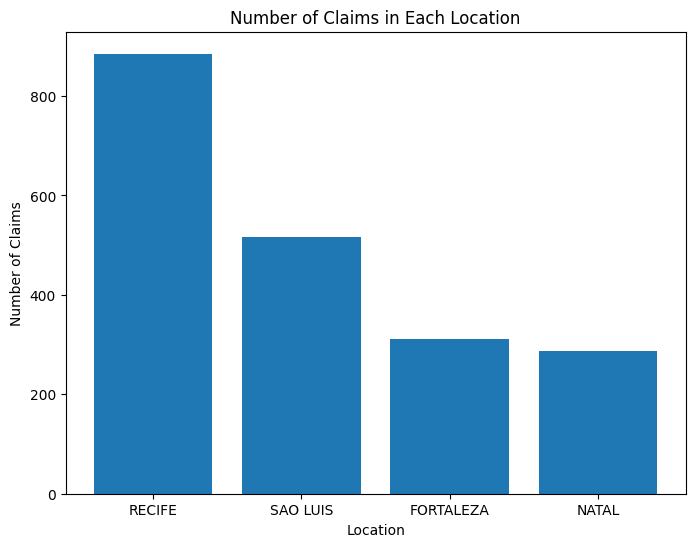

In [18]:
# Create a bar plot to visualize the number of claims in each location

location_counts = data['location'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.title('Number of Claims in Each Location')
 

# Show the plot
plt.show()

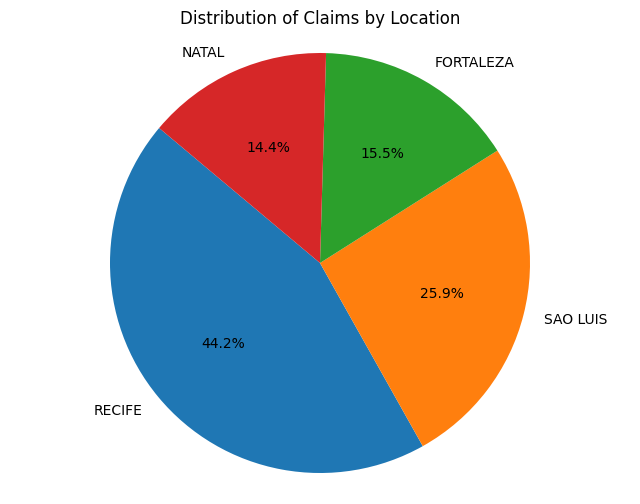

In [19]:
# Create a pie chart to visualize the number of claims in each location

plt.figure(figsize=(8, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Claims by Location')

# Show the plot
plt.show()

The visualizations show that there is a significant imbalance in the number of claims across the four locations. Recife has the most claims, with almost the half (800 claims). Sao Luis has the second most claims, with 600 claims. Fortaleza and Natal have the fewest claims. Locations with higher claim volumes might face more challenges in closing claims quickly, while those with fewer claims may have an easier time doing so.

## Task 3

Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.


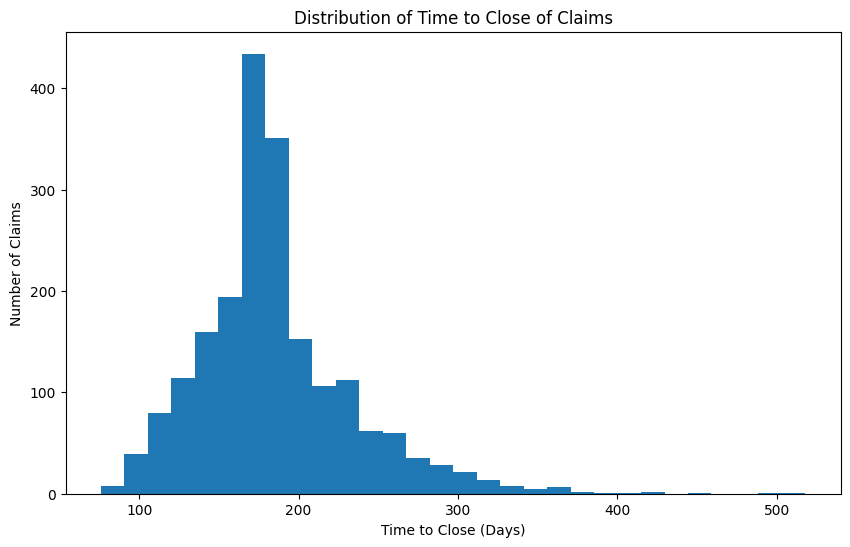

In [20]:
# Create a histogram to visualize the distribution of time to close

plt.figure(figsize=(10, 6))
plt.hist(data['time_to_close'],bins=30)
plt.xlabel('Time to Close (Days)')
plt.ylabel('Number of Claims')
plt.title('Distribution of Time to Close of Claims')
plt.show()

We can see from the graphic above that the most claims are closed between 170 and 200 days. The distribution of days for all claims in the visualization does have some symmetry. The explanation for the slight asymmetry is that there are some claims that are more complex or difficult to close than others. These claims may take longer to close, which would skew the distribution to the right. There are some outliers that get more than 350 days but this is very uncommon.

## Task 4

Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.


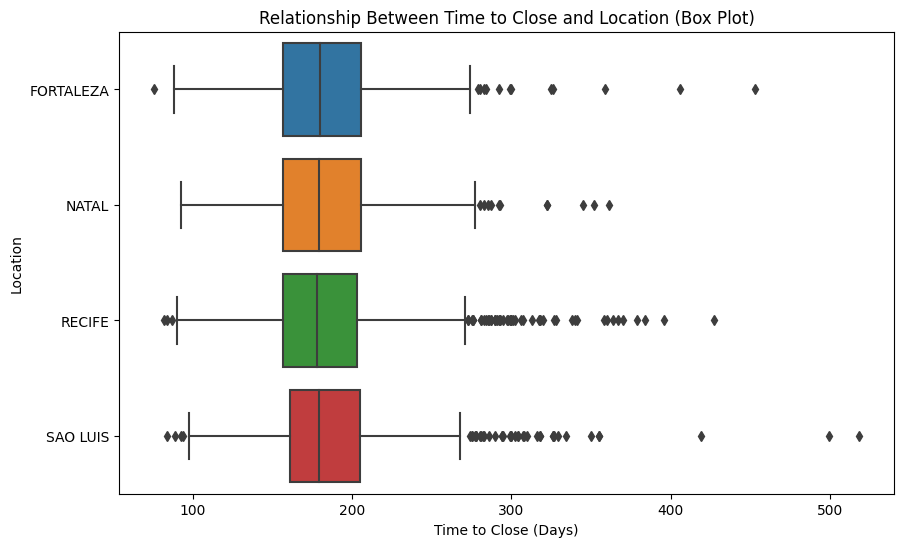

In [21]:
import seaborn as sns



# Create a box plot to demonstrate the relationship between "time to close" and "location"

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='time_to_close', y='location')
plt.ylabel('Location')
plt.xlabel('Time to Close (Days)')
plt.title('Relationship Between Time to Close and Location (Box Plot)')


# Show the plots
plt.show()

Finally we want to combine the two pieces of information to see how the location impacts time to close the claims.

When looking to the graphic above, we can see that claims in Recife tend to take longer to close than claims in the other three locations and the median time to close of all four locations is less than 200 days. This would indicate that the majority of claims are closed relatively quickly. However, there is still a significant number of claims that take longer to close. Also we observe that the interquartile range of the time to close is the smallest in Sao Luis comparing to other locations. So it is possible that the claims in Sao Luís are less complex or difficult to close than the claims in the other three locations. This could be because the types of claims that are filed in Sao Luís are different from the types of claims that are filed in the other locations, or it could be beacause the claims in Sao Luís are prioritized more than the claims in the other three locations. This could be because the Vivendo legal team has a policy of prioritizing claims in certain locations.

Based on all that, we can say that the claims in Recife are more complex or difficult to close than the claims in the other three locations, or they are less prioritized. So we  would recommend to investigate the reasons why claims in Recife take longer to close. This could be done by conducting interviews with claims adjusters or reviewing the files of closed claims. Also Vivendo has to increase the resources available to the claims team in Recife. This could involve hiring more claims adjusters or providing them with additional training and support. This would help to reduce the workload on claims adjusters in Recife, which could lead to faster processing times.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam